# Basic analysis plots for KPP test stand (standalone DAQ)

In [1]:
# External libraries
import sys
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Internal libaries

# anapytools
from anapytools.read_data import DataReader
rd = DataReader()
#from anapytools.parallelise import ParallelProcessor
# pa = ParallelProcessor() 

# pyutils
sys.path.append('../EventNtuple/utils/pyutils')

import pyimport as pyim
import pyprint as prnt
import pyplot as plot

pr = prnt.Print()
pl = plot.Plot()

In [3]:
# $ samweb list-file-locations --defname='raw.mu2e.CRV_wideband_cosmics.crvaging-019.dat' | grep 2101
# enstore:/pnfs/mu2e/tape/phy-raw/raw/mu2e/CRV_wideband_cosmics/crvaging-019/dat/3b/96	raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_004.dat	28818826000
# enstore:/pnfs/mu2e/tape/phy-raw/raw/mu2e/CRV_wideband_cosmics/crvaging-019/dat/d3/5e	raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_000.dat	29620635851
# enstore:/pnfs/mu2e/tape/phy-raw/raw/mu2e/CRV_wideband_cosmics/crvaging-019/dat/19/4a	raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_001.dat	29017394854
# enstore:/pnfs/mu2e/tape/phy-raw/raw/mu2e/CRV_wideband_cosmics/crvaging-019/dat/49/4e	raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_002.dat	28745939074
# enstore:/pnfs/mu2e/tape/phy-raw/raw/mu2e/CRV_wideband_cosmics/crvaging-019/dat/7d/d0	raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_003.dat	28525168935

# filename= 'raw.mu2e.CRV_wideband_cosmics.crvaging-019.002101_000.dat'
# file = rd.read_file(filename=filename) 

# > 2098 not processed yet? Check with Yuri and Ray. 

filename = '../Data/Reco/rec.mu2e.CRV_wideband_cosmics.crvaging-019.002100_000.root'

In [4]:
treenames_ = ['runSummary', 'run', 'spills'] 

In [5]:
# Open the file
file = uproot.open(filename)

# Get trees
trees_ = {treename: file[treename] for treename in treenames_  if treename in file}

arrays_ = {} 
for treename, tree in trees_.items():
    arrays_[treename] = tree.arrays() 
    
file.close()

In [6]:
pr.PrintNEvents(arrays_['runSummary'])
pr.PrintNEvents(arrays_['run'])
pr.PrintNEvents(arrays_['spills'])


---> Printing 1 event(s)...

-------------------------------------------------------------------------------------
runNumber: 2100
subrunNumber: 0
timestamp: 1733346374
febID: [5, 14, 17, 25, 22, 18, 20, 1]
spillsTotal: 38
spillsRecorded: 32
eventsRecorded: 22128
febSpills: [38, 36, 36, 37, 38, 38, 37, 36]
febTemperaturesAvg: [39.8, 40.4, 49.2, 42.6, 43.6, 44.2, 42.7, 42.1]
supplyMonitorsAvg: [[1.2, 1.79, 5.01, 9.84, 2.51, 4.96, 15, 3.33], ..., [1.2, 1.8, ..., 3.33]]
biasVoltagesAvg: [[54, 54.1, 54.1, 54.1, 54.1, 53.9, 53.7, 53.9], ..., [54, 53.9, ..., 53.9]]
pipeline: [160, 160, 160, 160, 160, 160, 160, 160]
samples: [128, 128, 128, 128, 128, 128, 128, 128]
PEs: [[0, 0, 0, 0, 47.9, 53.7, 54.3, ..., 49.5, 48.1, 48.9, 48.2, 49.3, 47.7], ...]
PEsTemperatureCorrected: [[0, 0, 0, 0, 49.7, 56, 56.1, ..., 52, 51.3, 50, 50.9, 50, 51.1, 49.8], ...]
FWHMs: [[0, 0, 0, 0, 37.7, 41, 36, ..., 35.6, 34.7, 35.2, 34.8, 35.6, 33.7, 32.3], ...]
FWHMsTemperatureCorrected: [[0, 0, 0, 0, 39.5, 40.5, 38.3,

## PEs

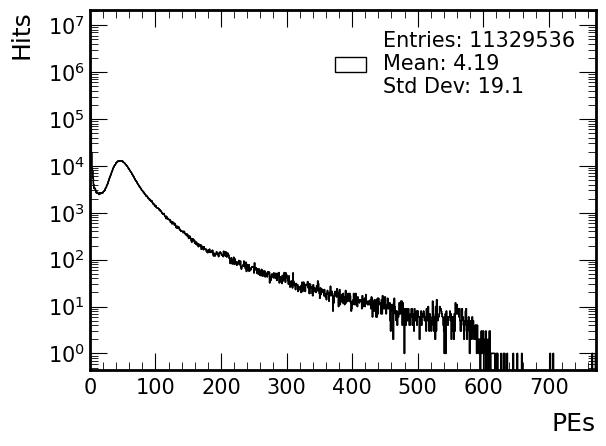


---> Wrote:
	 hist.png


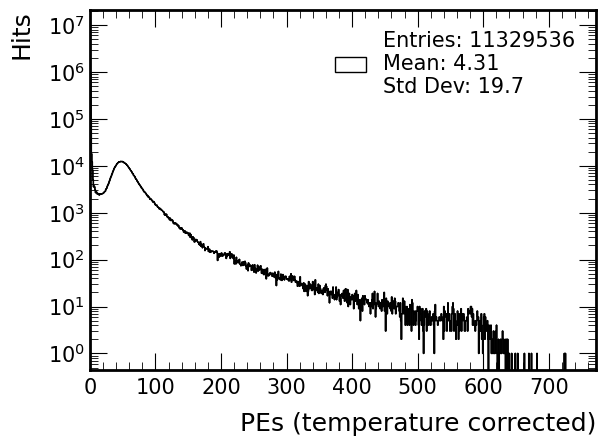


---> Wrote:
	 hist.png


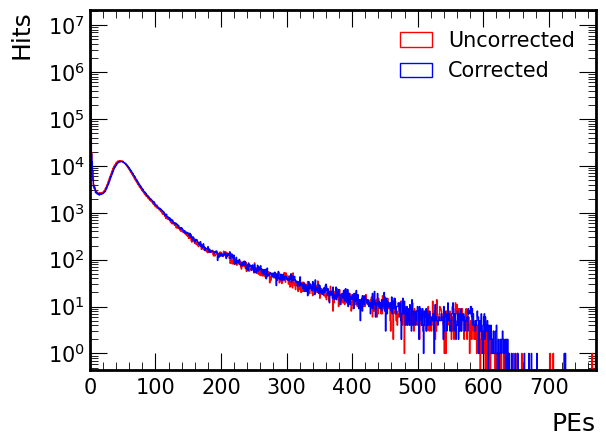


---> Wrote:
	 hist.png


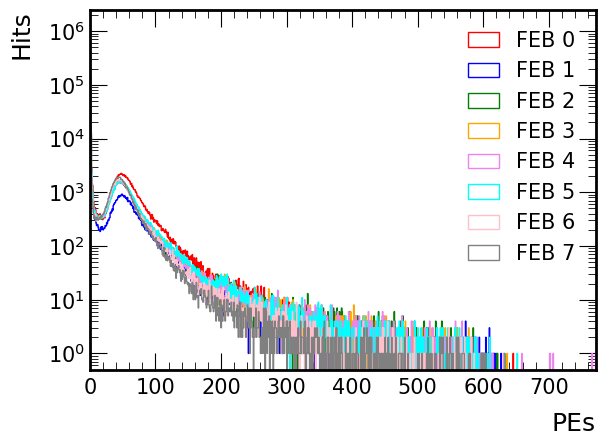


---> Wrote:
	 hist.png


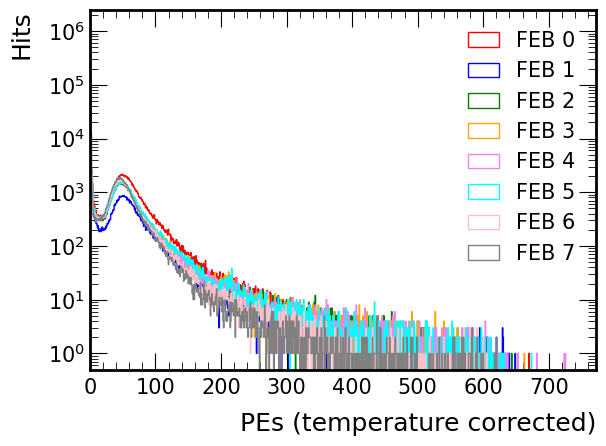


---> Wrote:
	 hist.png


In [7]:
PEs_ = ak.flatten(arrays_['run']['PEs'], axis=None)
PEsTemperatureCorrected_ = ak.flatten(arrays_['run']['PEsTemperatureCorrected'], axis=None)

pl.Plot1D(PEs_, nbins=1000, xmin=0, xmax=np.max(PEs_),
          xlabel='PEs', ylabel='Hits', 
          log_y=True, save=False)


pl.Plot1D(PEsTemperatureCorrected_, nbins=1000, xmin=0, xmax=np.max(PEs_),
          xlabel='PEs (temperature corrected)', ylabel='Hits', 
          log_y=True, save=False)

pl.Plot1DOverlay( { 'Uncorrected' : PEs_, 
                    'Corrected' : PEsTemperatureCorrected_
                   }, 
                  nbins=1000, xmin=0, xmax=np.max(PEs_),
                  xlabel='PEs', ylabel='Hits', 
                  log_y=True, save=False)

# PEs per FEB 
pl.Plot1DOverlay( { 'FEB 0' : ak.flatten(arrays_['run']['PEs'][:,0,:], axis=None), 
                   'FEB 1' : ak.flatten(arrays_['run']['PEs'][:,1,:], axis=None), 
                   'FEB 2' : ak.flatten(arrays_['run']['PEs'][:,2,:], axis=None), 
                   'FEB 3' : ak.flatten(arrays_['run']['PEs'][:,3,:], axis=None), 
                   'FEB 4' : ak.flatten(arrays_['run']['PEs'][:,4,:], axis=None), 
                   'FEB 5' : ak.flatten(arrays_['run']['PEs'][:,5,:], axis=None), 
                   'FEB 6' : ak.flatten(arrays_['run']['PEs'][:,6,:], axis=None), 
                   'FEB 7' : ak.flatten(arrays_['run']['PEs'][:,7,:], axis=None) 
                  },
                  nbins=1000, xmin=0, xmax=np.max(PEs_),
                  xlabel='PEs', ylabel='Hits', 
                  log_y=True, save=False)

# PEs per FEB 
pl.Plot1DOverlay( { 'FEB 0' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,0,:], axis=None), 
                   'FEB 1' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,1,:], axis=None), 
                   'FEB 2' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,2,:], axis=None), 
                   'FEB 3' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,3,:], axis=None), 
                   'FEB 4' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,4,:], axis=None), 
                   'FEB 5' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,5,:], axis=None), 
                   'FEB 6' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,6,:], axis=None), 
                   'FEB 7' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,7,:], axis=None) 
                  },
                  nbins=1000, xmin=0, xmax=np.max(PEs_),
                  xlabel='PEs (temperature corrected)', ylabel='Hits', 
                  log_y=True, save=False)


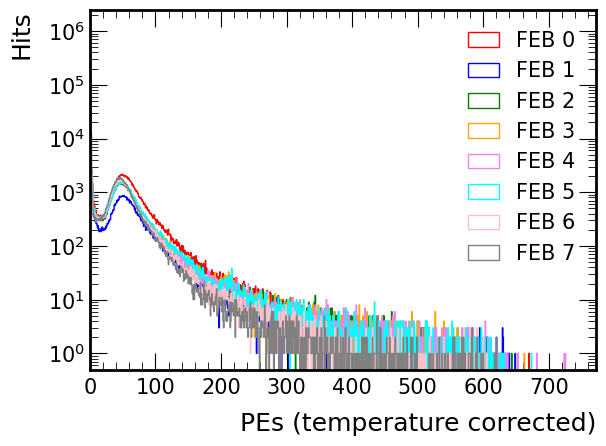


---> Wrote:
	 hist.png


In [8]:
# PEs per layer for CRV-L-end 

# PEs per FEB 
pl.Plot1DOverlay( { 'FEB 0' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,0,:], axis=None), 
                   'FEB 1' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,1,:], axis=None), 
                   'FEB 2' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,2,:], axis=None), 
                   'FEB 3' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,3,:], axis=None), 
                   'FEB 4' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,4,:], axis=None), 
                   'FEB 5' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,5,:], axis=None), 
                   'FEB 6' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,6,:], axis=None), 
                   'FEB 7' : ak.flatten(arrays_['run']['PEsTemperatureCorrected'][:,7,:], axis=None) 
                  },
                  nbins=1000, xmin=0, xmax=np.max(PEs_),
                  xlabel='PEs (temperature corrected)', ylabel='Hits', 
                  log_y=True, save=False)


In [9]:
print("# Events:", len(arrays_['run']['PEs'][:,0,0]))
print("# FEBs:", len(arrays_['run']['PEs'][0,:,0]))
print("# channels:", len(arrays_['run']['PEs'][0,0,:]))

# Events: 22128
# FEBs: 8
# channels: 64


In [10]:
# print(np.sum(ak.to_numpy(arrays_['run']['PEs'][:,:,:]), axis=0))
# print(ak.sum(arrays_['run']['PEs'][:,:,:]), axis=0)

## Occupancy 

8 64


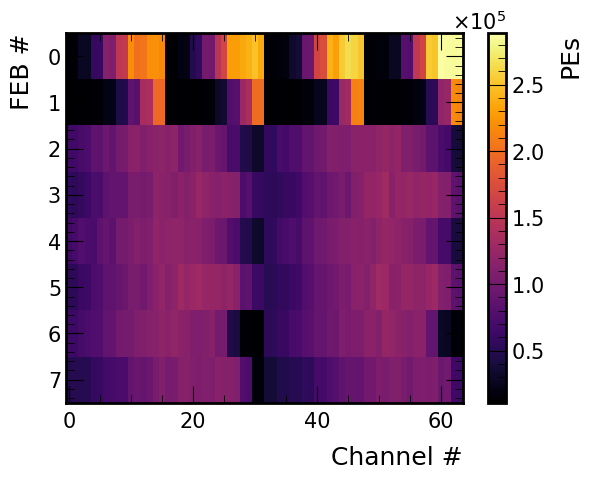

In [11]:
# Occupancy 
occ_ = np.sum(ak.to_numpy(arrays_['run']['PEs'][:,:,:]), axis=0)
# print(occ_)
fig, ax = plt.subplots()
map_ = ax.imshow(occ_,  cmap='inferno', aspect='auto')
x_ = np.arange(arrays_['spills']['spill_number_of_febs'][0])  # FEB indices (x-axis)
y_ = np.arange(arrays_['spills']['spill_channels_per_feb'][0]) 

print(arrays_['spills']['spill_number_of_febs'][0], arrays_['spills']['spill_channels_per_feb'][0])
cbar = plt.colorbar(map_)
cmax = cbar.norm.vmax
if abs(cmax) >= 1e4 or abs(cmax) <= 1e-4:
  cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Use math formatting
  cbar.ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # Set scientific notation
ax.set_xlabel('Channel #')
ax.set_ylabel('FEB #')
cbar.ax.set_ylabel('PEs')
plt.show()

(8, 64)
8 64


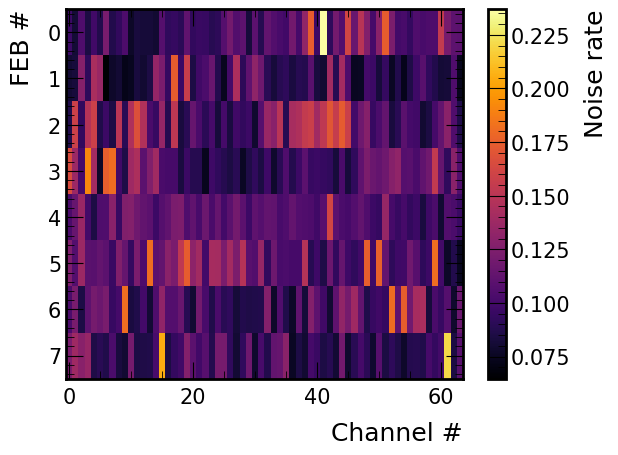

In [12]:
# Occupancy 
occ_ = ak.to_numpy(arrays_['runSummary']['noiseRate'][0]) # , axis=0)
print(occ_.shape)
# print(occ_)
fig, ax = plt.subplots()
map_ = ax.imshow(occ_,  cmap='inferno', aspect='auto')
x_ = np.arange(arrays_['spills']['spill_number_of_febs'][0])  # FEB indices (x-axis)
y_ = np.arange(arrays_['spills']['spill_channels_per_feb'][0]) 

print(arrays_['spills']['spill_number_of_febs'][0], arrays_['spills']['spill_channels_per_feb'][0])
cbar = plt.colorbar(map_)
cmax = cbar.norm.vmax
if abs(cmax) >= 1e4 or abs(cmax) <= 1e-4:
  cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Use math formatting
  cbar.ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  # Set scientific notation
ax.set_xlabel('Channel #')
ax.set_ylabel('FEB #')
cbar.ax.set_ylabel('Noise rate')
plt.show()

## Time & temperature

(22128,)


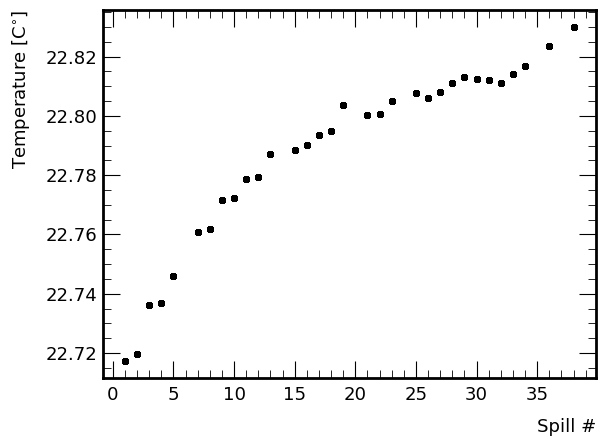


---> Wrote:
	 graph.png


In [14]:
time_ = ak.flatten(arrays_['run']['time'], axis=None)
temp_ = ak.flatten(arrays_['run']['temperature'], axis=None)

# pl.Plot1D(time_, nbins=100, xmin=0, xmax=np.max(time_),
#           xlabel='Time', ylabel='Hits',
#           stats=False, log_y=True, save=False) 

# pl.Plot1D(temp_, nbins=40, xmin=21, xmax=25,
#           xlabel=r'Temperature [C$^{\circ}$]', ylabel='Hits',
#           stats=False, save=False) 

tempPerSpill_ = np.mean(np.mean(ak.to_numpy(arrays_['run']['temperature']), axis=1), axis=1)
print(tempPerSpill_.shape)

spill_ =  ak.flatten(arrays_['run']['spillNumber'], axis=None)

pl.PlotGraph(x=spill_, y=tempPerSpill_,
             xlabel='Spill #', ylabel=r'Temperature [C$^{\circ}$]', save=False)



In [ ]:
# pl.Plot2D(x_=time_, nbins_x=100, xmin=0, xmax=np.max(time_), y_=temp_, nbins_y=40, ymin=21, ymax=25, 
#           xlabel='Time', ylabel=r'Temperature [C$^{\circ}$]', 
#           save=False, show=True)